In [29]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
survey=pd.read_csv('./imdb_top_1000.csv')



In [5]:
survey.head()
survey.shape
survey.info()
survey.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [30]:
#We make a copy of our data
survey_copy=survey.copy()
survey_copy.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [31]:
survey_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [32]:
#=== STEP 1: CHECK FOR DUPLICATES ===
#check for duplicates
print(survey_copy.duplicated().sum())
#we drop our duplicates
survey_copy=survey_copy.drop_duplicates()
survey_copy.shape

0


(1000, 16)

In [33]:
# === STEP 2: MISSING VALUE ANALYSIS ===
missing_count=survey_copy.isnull().sum()
missing_percentage=missing_count/len(survey_copy)*100
missing_df=pd.DataFrame({'count':missing_count,'percentage':missing_percentage})
missing_df[missing_df['count'] > 0]

#for the columns Certificate(mode)/Meta_score/Gross(mode) we have 40% of missing value -> we can IMPUTE with mode
print(f"Certificate missing before: {survey_copy['Certificate'].isnull().sum()}")
survey_copy['Certificate'] = survey_copy['Certificate'].fillna(survey_copy['Certificate'].mode()[0])
print(f"Certificate missing after: {survey_copy['Certificate'].isnull().sum()}")

print(f"Gross missing before: {survey_copy['Gross'].isnull().sum()}")
survey_copy['Gross'] = survey_copy['Gross'].fillna(survey_copy['Gross'].mode()[0])
print(f"Gross missing after: {survey_copy['Gross'].isnull().sum()}")

#for the columns Meta_score we have 40% of missing value -> we can IMPUTE with mode
print(f"Meta_score missing before: {survey_copy['Meta_score'].isnull().sum()}")

age_imputer = SimpleImputer(strategy='median')
survey_copy['Meta_score'] = age_imputer.fit_transform(survey_copy[['Meta_score']])
print(f"Meta_score missing after: {survey_copy['Meta_score'].isnull().sum()}")


Certificate missing before: 101
Certificate missing after: 0
Gross missing before: 169
Gross missing after: 0
Meta_score missing before: 157
Meta_score missing after: 0


In [34]:
#convert data types as needed
survey_copy['Released_Year'] = pd.to_numeric(survey_copy['Released_Year'], errors='coerce')
survey_copy['Runtime'] = survey_copy['Runtime'].str.replace(' min', '').astype(int)
survey_copy['Gross'] = survey_copy['Gross'].str.replace(',', '')
survey_copy['Gross'] = pd.to_numeric(survey_copy['Gross'], errors='coerce')

In [35]:
survey_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 125.1+ KB


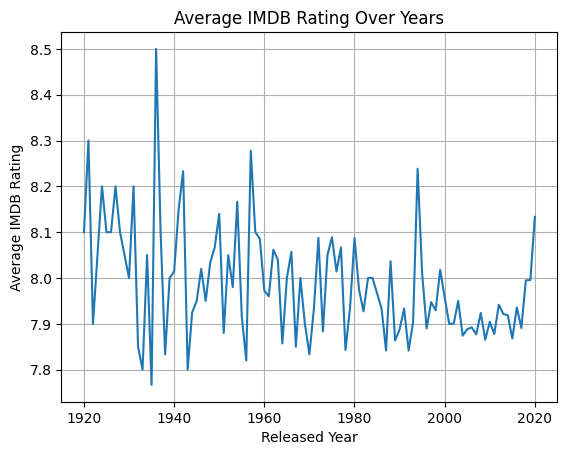

In [43]:
#Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
yearly_avg = survey_copy.groupby('Released_Year')['IMDB_Rating'].mean()
plt.plot(yearly_avg.index, yearly_avg.values)
plt.title("Average IMDB Rating Over Years")
plt.xlabel("Released Year")
plt.ylabel("Average IMDB Rating")
plt.grid(True)
plt.show()

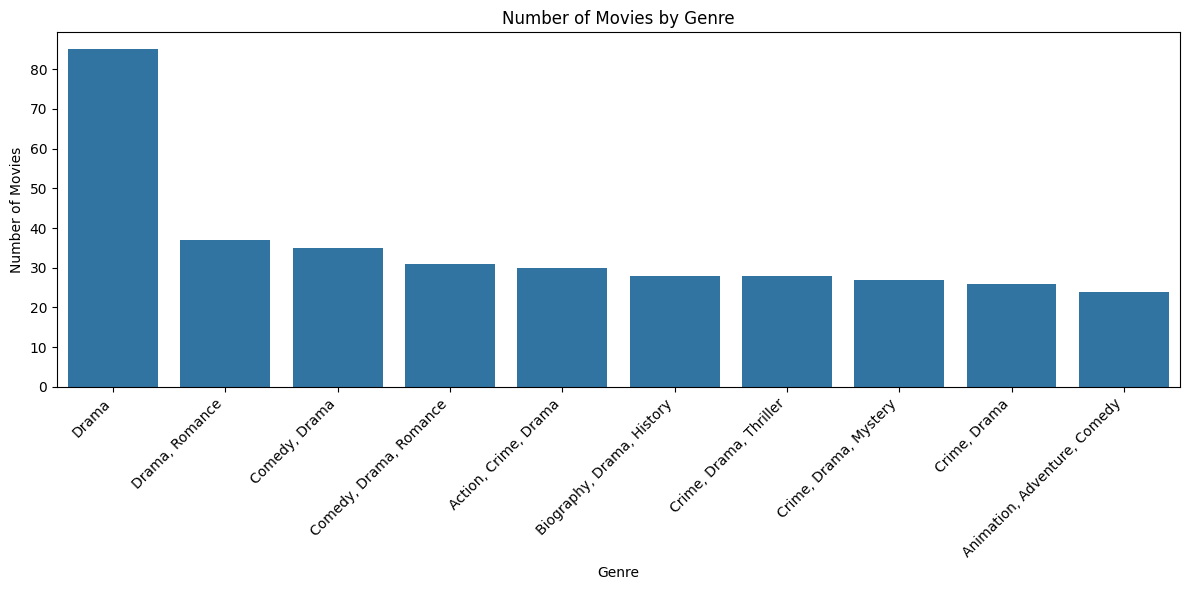

In [48]:
#Generate a Seaborn bar plot to compare the number of movies across different genres.
genre_counts = survey_copy['Genre'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values)
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Index(['Aamir Khan', 'Aaron Sorkin', 'Abdellatif Kechiche', 'Abhishek Chaubey',
       'Abhishek Kapoor', 'Adam Elliot', 'Adam McKay', 'Aditya Chopra',
       'Aditya Dhar', 'Akira Kurosawa'],
      dtype='object', name='Director')


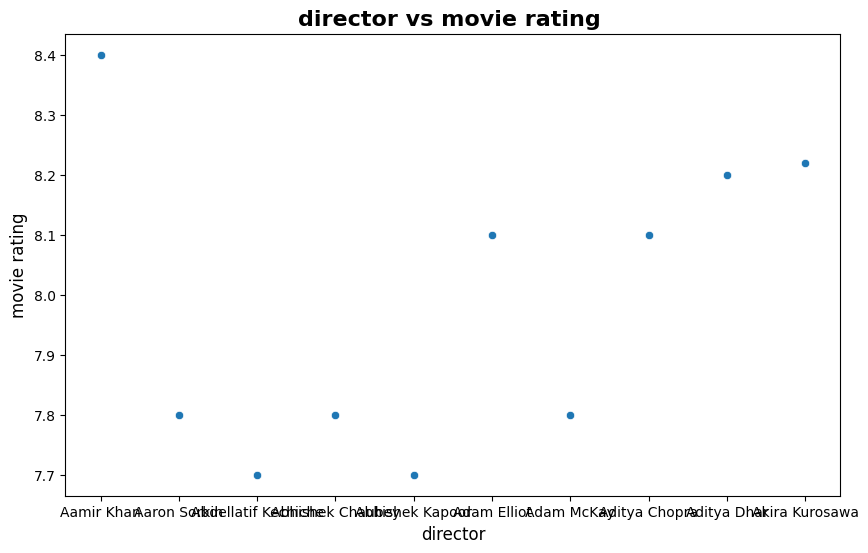

In [59]:
#Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.
rating_avg = survey_copy.groupby('Director')['IMDB_Rating'].mean()
print(rating_avg.head(10).index)
plt.figure(figsize=(10, 6))

sns.scatterplot( x=rating_avg.head(10).index, y=rating_avg.head(10).values)
plt.title("director vs movie rating ", fontsize=16, fontweight='bold')
plt.xlabel("director", fontsize=12)
plt.ylabel("movie rating", fontsize=12)
plt.show()

KeyError: 'origin'

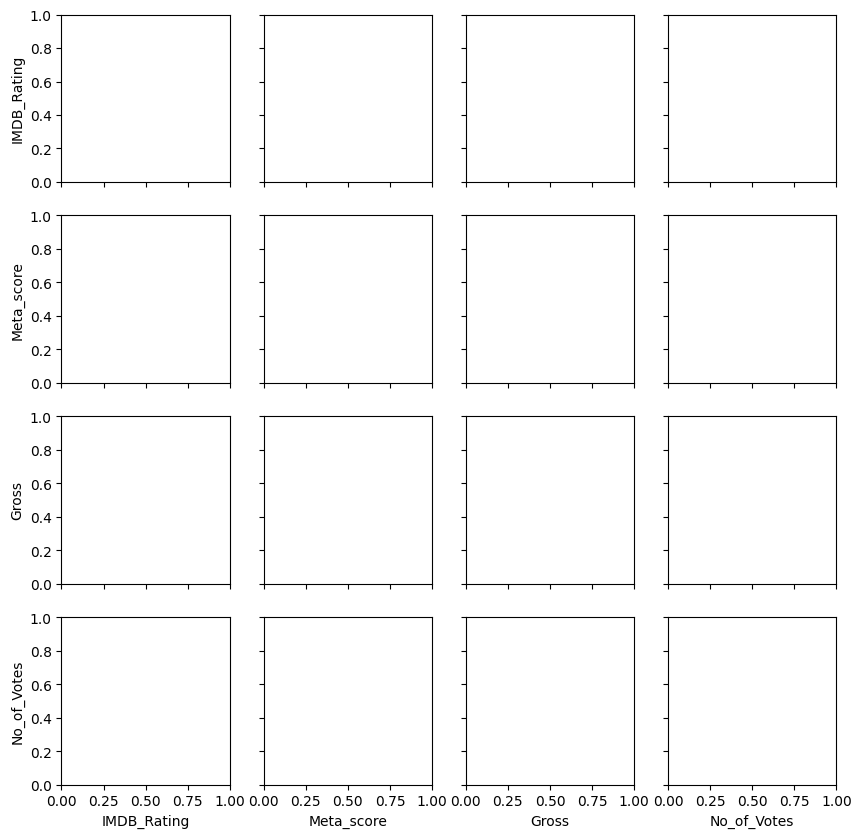

In [64]:
#Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
mpg_subset = survey_copy[['IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']].dropna()

sns.pairplot(mpg_subset, hue='origin', diag_kind='hist', height=2.5)

plt.suptitle('MPG Dataset: Pairwise Relationships', y=1.02, fontsize=14, fontweight='bold')
plt.show()

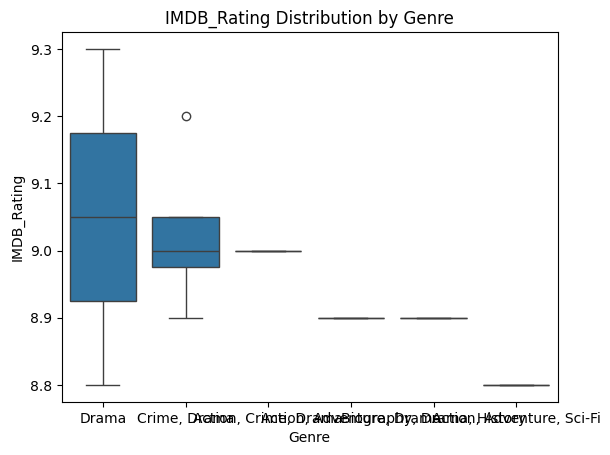

In [69]:
#Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.
sns.boxplot(x=survey_copy['Genre'].head(10) , y= survey_copy['IMDB_Rating'].head(10), data=survey_copy)
plt.title('IMDB_Rating Distribution by Genre')
plt.show()

Correlation Matrix (raw numbers):
             IMDB_Rating  Meta_score  No_of_Votes  Gross
IMDB_Rating         1.00        0.26         0.49   0.08
Meta_score          0.26        1.00        -0.03  -0.06
No_of_Votes         0.49       -0.03         1.00   0.60
Gross               0.08       -0.06         0.60   1.00


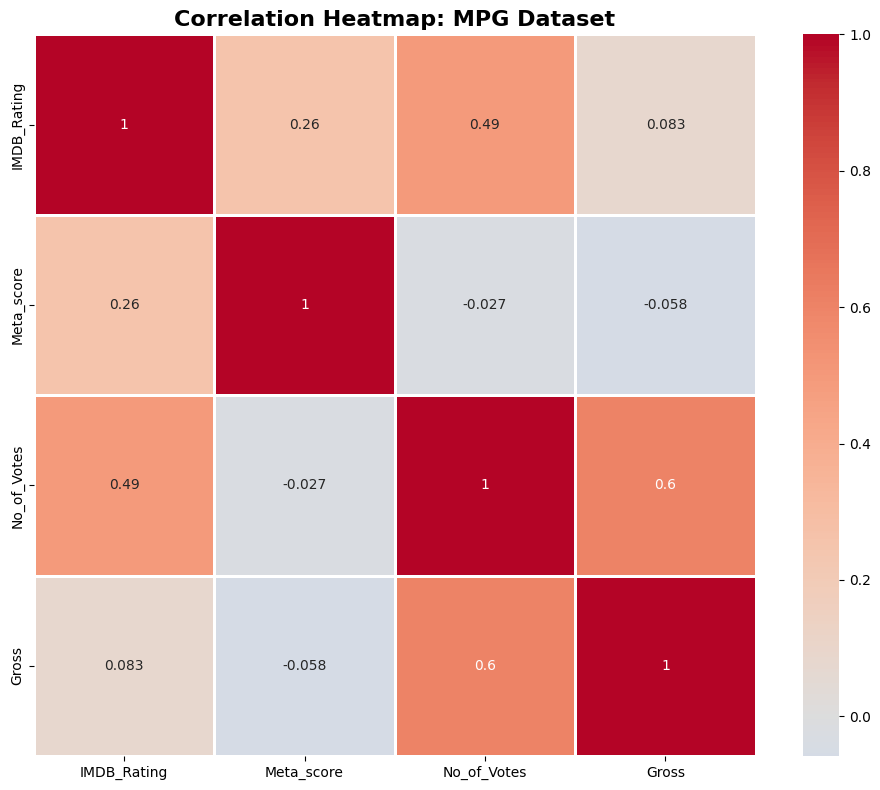

In [71]:
#Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
corr_matrix = survey_copy[numeric_cols].corr()

print("Correlation Matrix (raw numbers):")
print(corr_matrix.round(2))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
             annot=True, # Show numbers
             cmap='coolwarm', # Red-white-blue color scheme
             center=0, # White at 0
             square=True, # Squaare cells
             linewidths=1 # Cell borders
            )

plt.title("Correlation Heatmap: MPG Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()


plt.show()

